<a href="https://colab.research.google.com/github/mona-jha/Machine-Learning-II/blob/main/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1><b>Assignment-1(ML2)<b> <br>


<h2> Name : Mona Kumari <br>
Roll No. :<b> CS2311</b>




---



# **Denoising Autoencoders**<br>


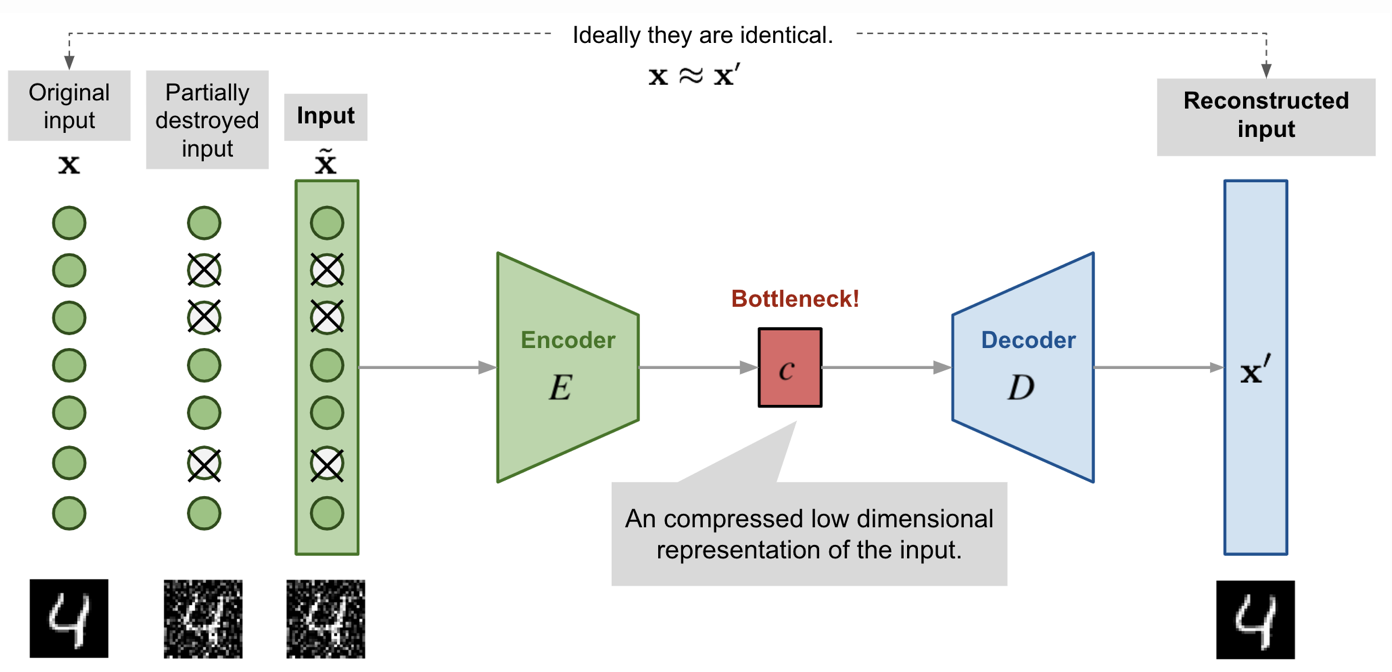




##Problem-1
What is Denoising Autoencoder ? Write the Pseudocode for Denoising Autoencoder training loop.








A Denoising Autoencoder (DAE) is a type of neural network used to learn efficient representations of data, typically for the purpose of removing noise from the data. It is a variant of the standard autoencoder, which is trained to reconstruct its input. The key difference is that a denoising autoencoder is trained to reconstruct the original input from a corrupted version of it. This forces the model to learn more robust features that are useful for denoising.

<br>Pseudocode for Denoising Autoencoder Training Loop<br>

Initialize the denoising autoencoder model
model = DenoisingAutoencoder()

Define the loss function and optimizer
loss_function = MeanSquaredError()
optimizer = AdamOptimizer()

Number of epochs for training
num_epochs = 100

Training loop
for epoch in range(num_epochs):
    for batch in training_data:
        # Add noise to the input data
        noisy_batch = add_noise(batch)
        
        # Forward pass: compute the model's output
        reconstructed_batch = model.forward(noisy_batch)
        
        # Compute the loss between the reconstructed batch and the original batch
        loss = loss_function(reconstructed_batch, batch)
        
        # Backward pass: compute gradients
        gradients = model.backward(loss)
        
        # Update model parameters
        optimizer.step(gradients)
    
    # Optionally, print the loss for monitoring
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")




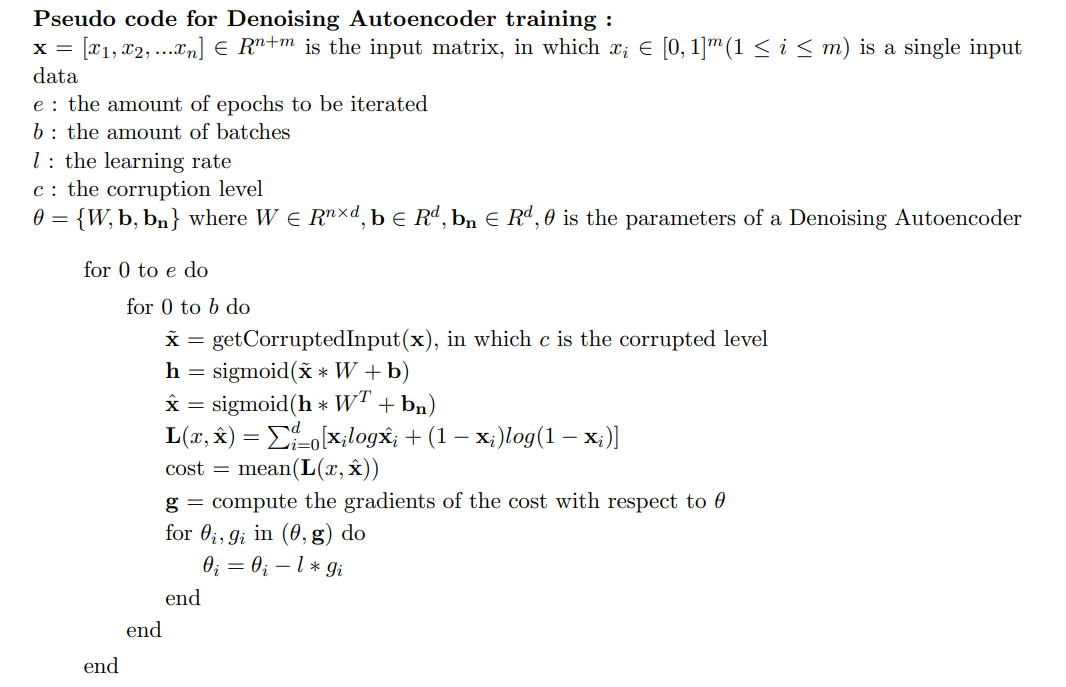

#Ans

---
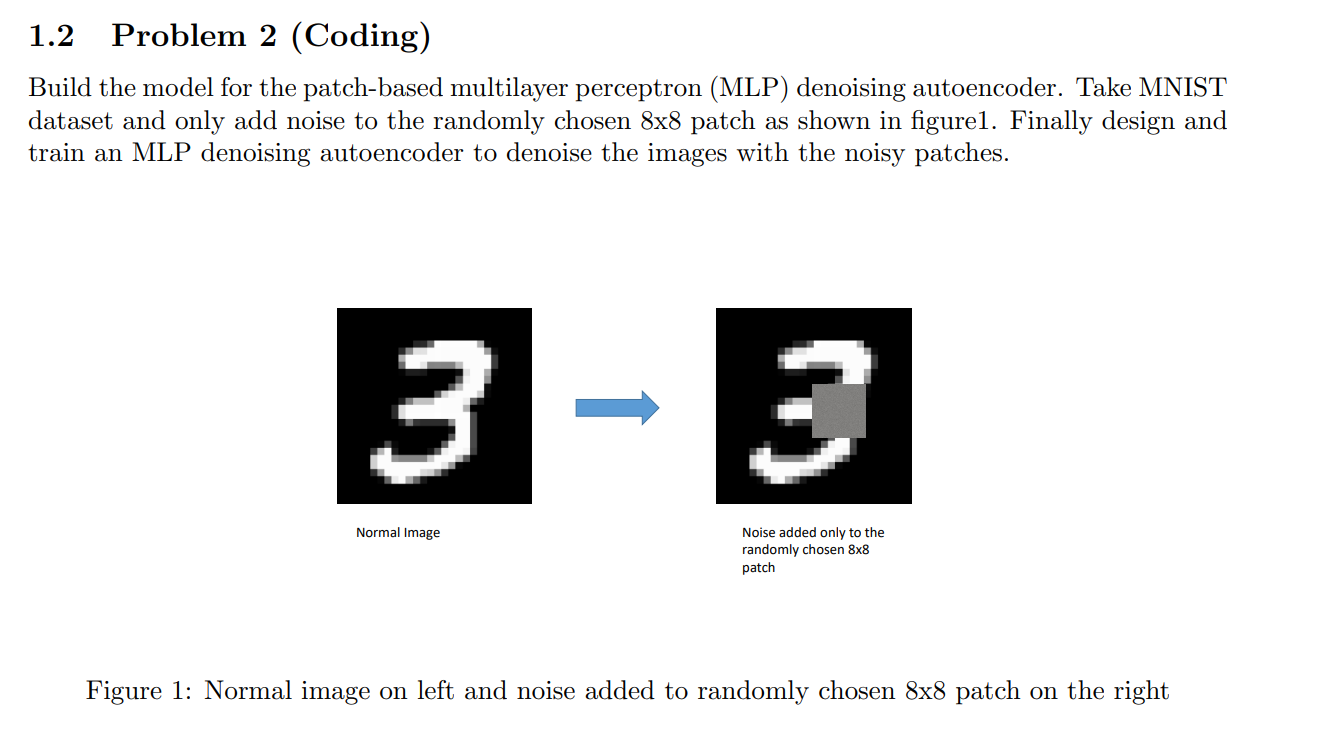

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Data Preparation

# Define transformations for the dataset
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the MNIST dataset
train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
test_set = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=tensor_transform)

# Create DataLoader for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=32, shuffle=True)

In [ ]:
# Step 2: Define the Denoising Autoencoder Model

class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Define the encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # Define the decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:

# Step 3: Define the Loss Function and Optimizer

model = DenoisingAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18545368.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 684835.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5605626.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6872485.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/20], Loss: 0.0286


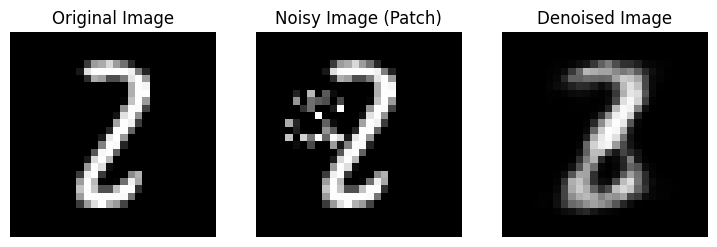

Epoch [2/20], Loss: 0.0227


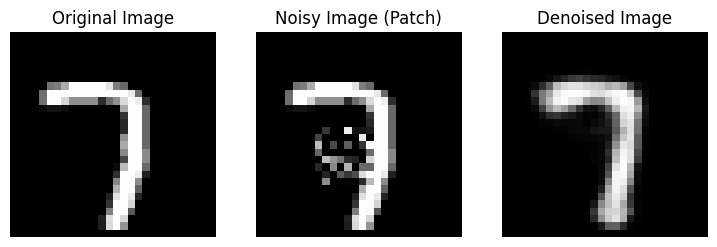

Epoch [3/20], Loss: 0.0188


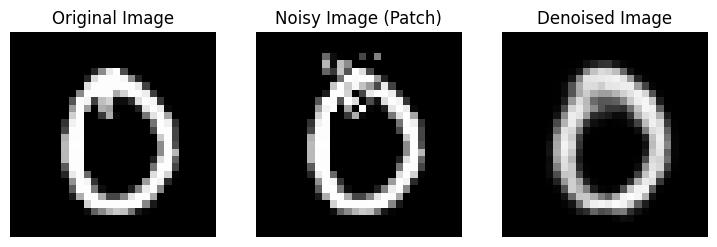

Epoch [4/20], Loss: 0.0158


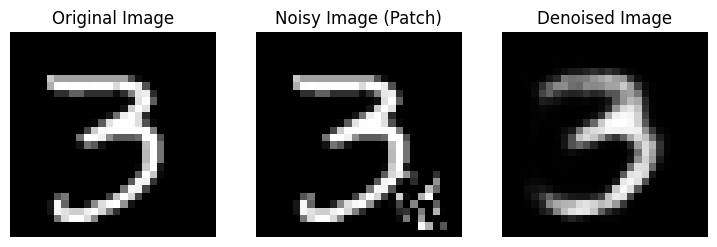

Epoch [5/20], Loss: 0.0156


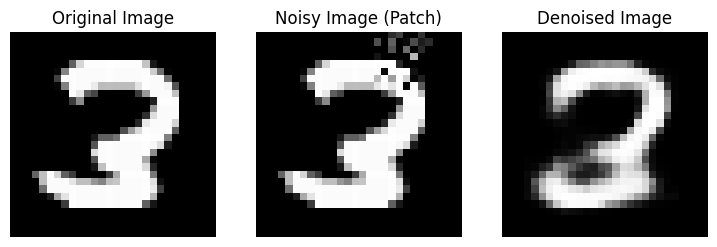

Epoch [6/20], Loss: 0.0176


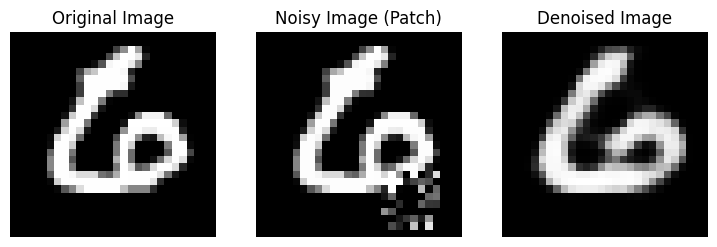

Epoch [7/20], Loss: 0.0118


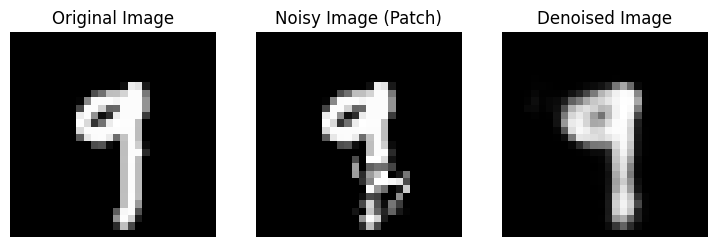

Epoch [8/20], Loss: 0.0134


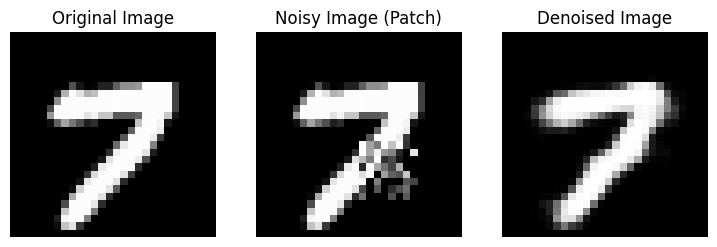

Epoch [9/20], Loss: 0.0131


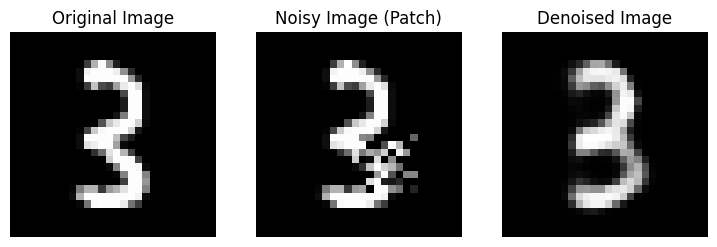

Epoch [10/20], Loss: 0.0121


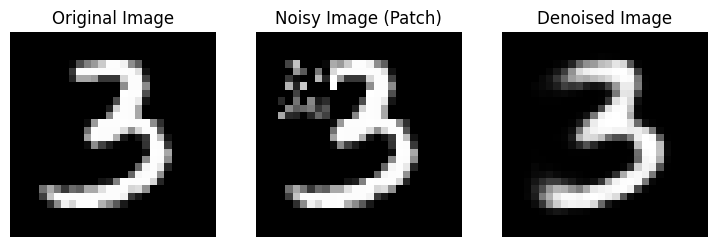

Epoch [11/20], Loss: 0.0132


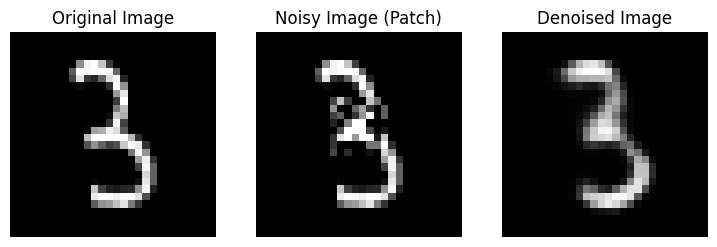

Epoch [12/20], Loss: 0.0118


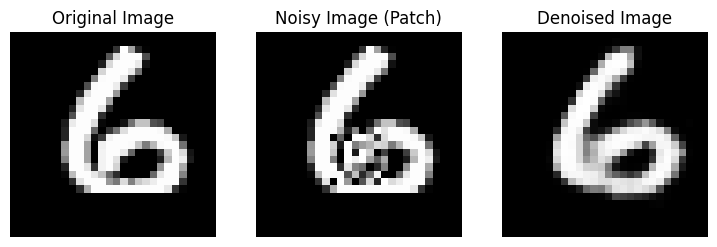

Epoch [13/20], Loss: 0.0142


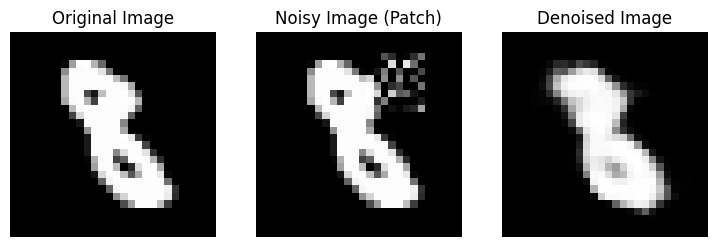

Epoch [14/20], Loss: 0.0093


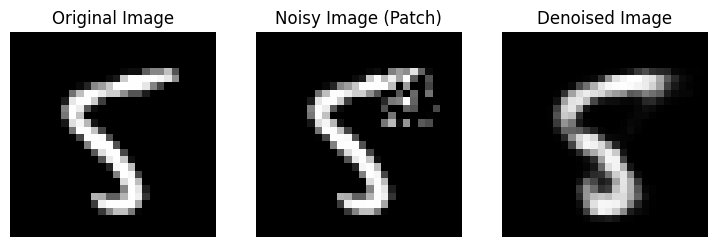

Epoch [15/20], Loss: 0.0110


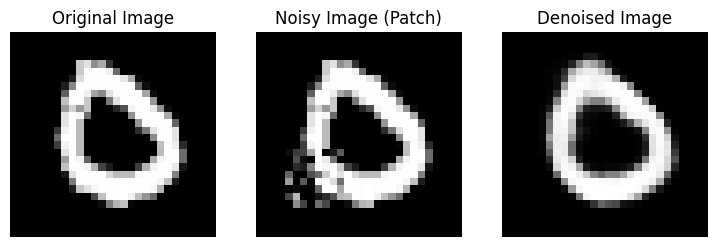

Epoch [16/20], Loss: 0.0138


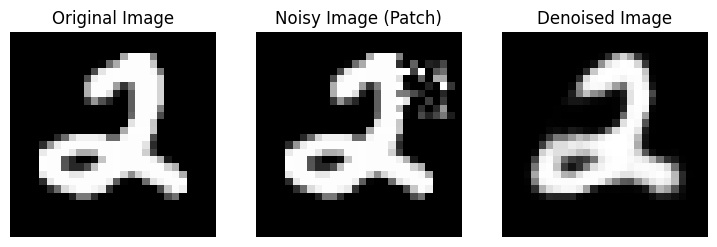

Epoch [17/20], Loss: 0.0115


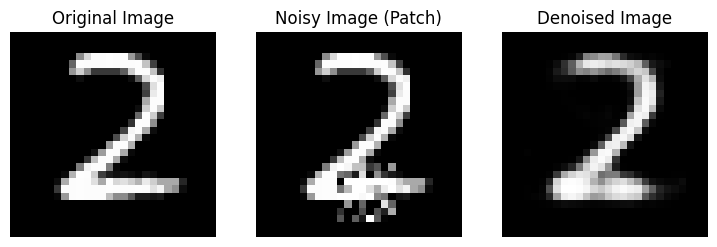

Epoch [18/20], Loss: 0.0100


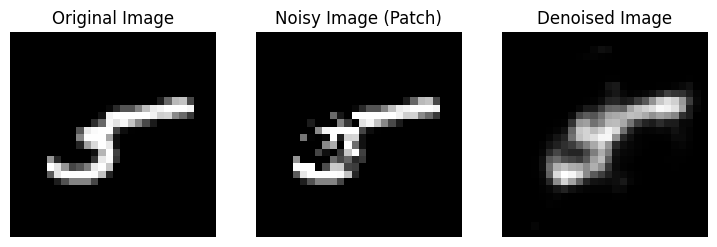

Epoch [19/20], Loss: 0.0112


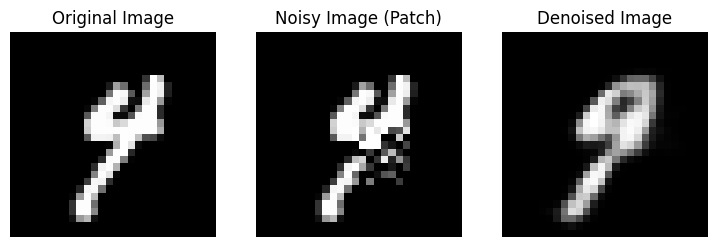

Epoch [20/20], Loss: 0.0104


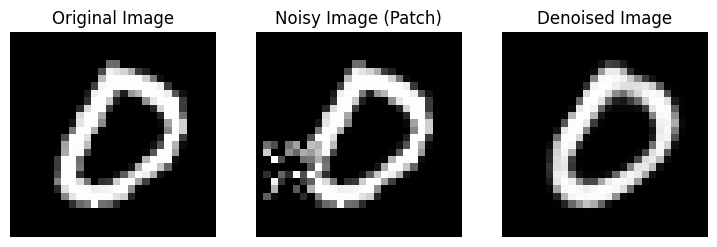

In [ ]:
# Step 4: Training the Denoising Autoencoder

patch_size = 8
num_epochs = 20

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data

        # Create a copy of the original images
        noisy_img = img.clone()

        # Add noise to a randomly selected 8x8 patch
        for i in range(noisy_img.size(0)):  # Iterate through each image in the batch
            x_start = torch.randint(0, 28-patch_size, (1,)).item()
            y_start = torch.randint(0, 28-patch_size, (1,)).item()
            noisy_img[i, 0, x_start:x_start+patch_size, y_start:y_start+patch_size] += 0.5 * torch.randn(patch_size, patch_size)

        noisy_img = torch.clamp(noisy_img, 0., 1.)

        # Forward pass: compute the output and loss
        output = model(noisy_img.view(-1, 28*28))
        loss = criterion(output, img.view(-1, 28*28))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Step 5: Visualize the results
    with torch.no_grad():
        output = output.view(-1, 1, 28, 28)
        img = img.view(-1, 1, 28, 28)
        noisy_img = noisy_img.view(-1, 1, 28, 28)

        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(9, 3))
        axes[0].imshow(img[0].cpu().squeeze(), cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(noisy_img[0].cpu().squeeze(), cmap='gray')
        axes[1].set_title('Noisy Image (Patch)')
        axes[1].axis('off')

        axes[2].imshow(output[0].cpu().squeeze(), cmap='gray')
        axes[2].set_title('Denoised Image')
        axes[2].axis('off')

        plt.show()

# Step 6: Evaluate the Model
# Optionally, you can evaluate the model on the test set using the same approach
